In [1]:
import pandas as pds
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [2]:
def read_file(fname):
    with open(fname, encoding="utf-8") as f:
        content = f.readlines()
    # you may also want to remove whitespace characters like `\n` at the end of each line
    content = [x.strip() for x in content]
    
    return pds.DataFrame(content)

Import files

In [3]:
tr_dat = pds.read_pickle("train_data_regex.pkl")
te_dat = pds.read_pickle("test_data_regex.pkl")
train = pds.concat([tr_dat, read_file('y_train.txt')], axis=1)
train.columns = ['x', 'label']

test = pds.concat([te_dat, read_file('y_test.txt')], axis=1)
test.columns = ['x', 'label']

In [4]:
id_to_lang = pds.read_pickle("id_to_lang.pkl")

Create count matrix of each word in train data

In [5]:
cv = CountVectorizer()

In [6]:
x_train_counts = cv.fit_transform(train.x)

Train NB-cv model

In [8]:
#tfidf_transformer = TfidfTransformer()
#X_train_tfidf = tfidf_transformer.fit_transform(x_train_counts)
clf = MultinomialNB().fit(x_train_counts, train.label)

Transform test set to matrix form

In [9]:
y_data = cv.transform(test.x)

and make predictions

In [10]:
predictions = clf.predict(y_data)

In [11]:
print("Accuracy        : ", sum(test.label == predictions) / len(predictions) * 100)
print("Macroprecision  : ", precision_score(test.label, predictions, average="macro")*100)
print("MicroPrecision  : ", precision_score(test.label, predictions, average="micro")*100)
print("Recall          : ", recall_score(test.label, predictions, average="weighted")* 100)
print("F1              : ", f1_score(test.label, predictions, average="weighted")* 100)

Accuracy        :  93.86808510638298
Macroprecision  :  95.89149081546118
MicroPrecision  :  93.86808510638298
Recall          :  93.86808510638298
F1              :  94.38769720081189


Better without TF-IDF!

In [13]:
conf_mat = confusion_matrix(test.label, predictions, id_to_lang.label.values)

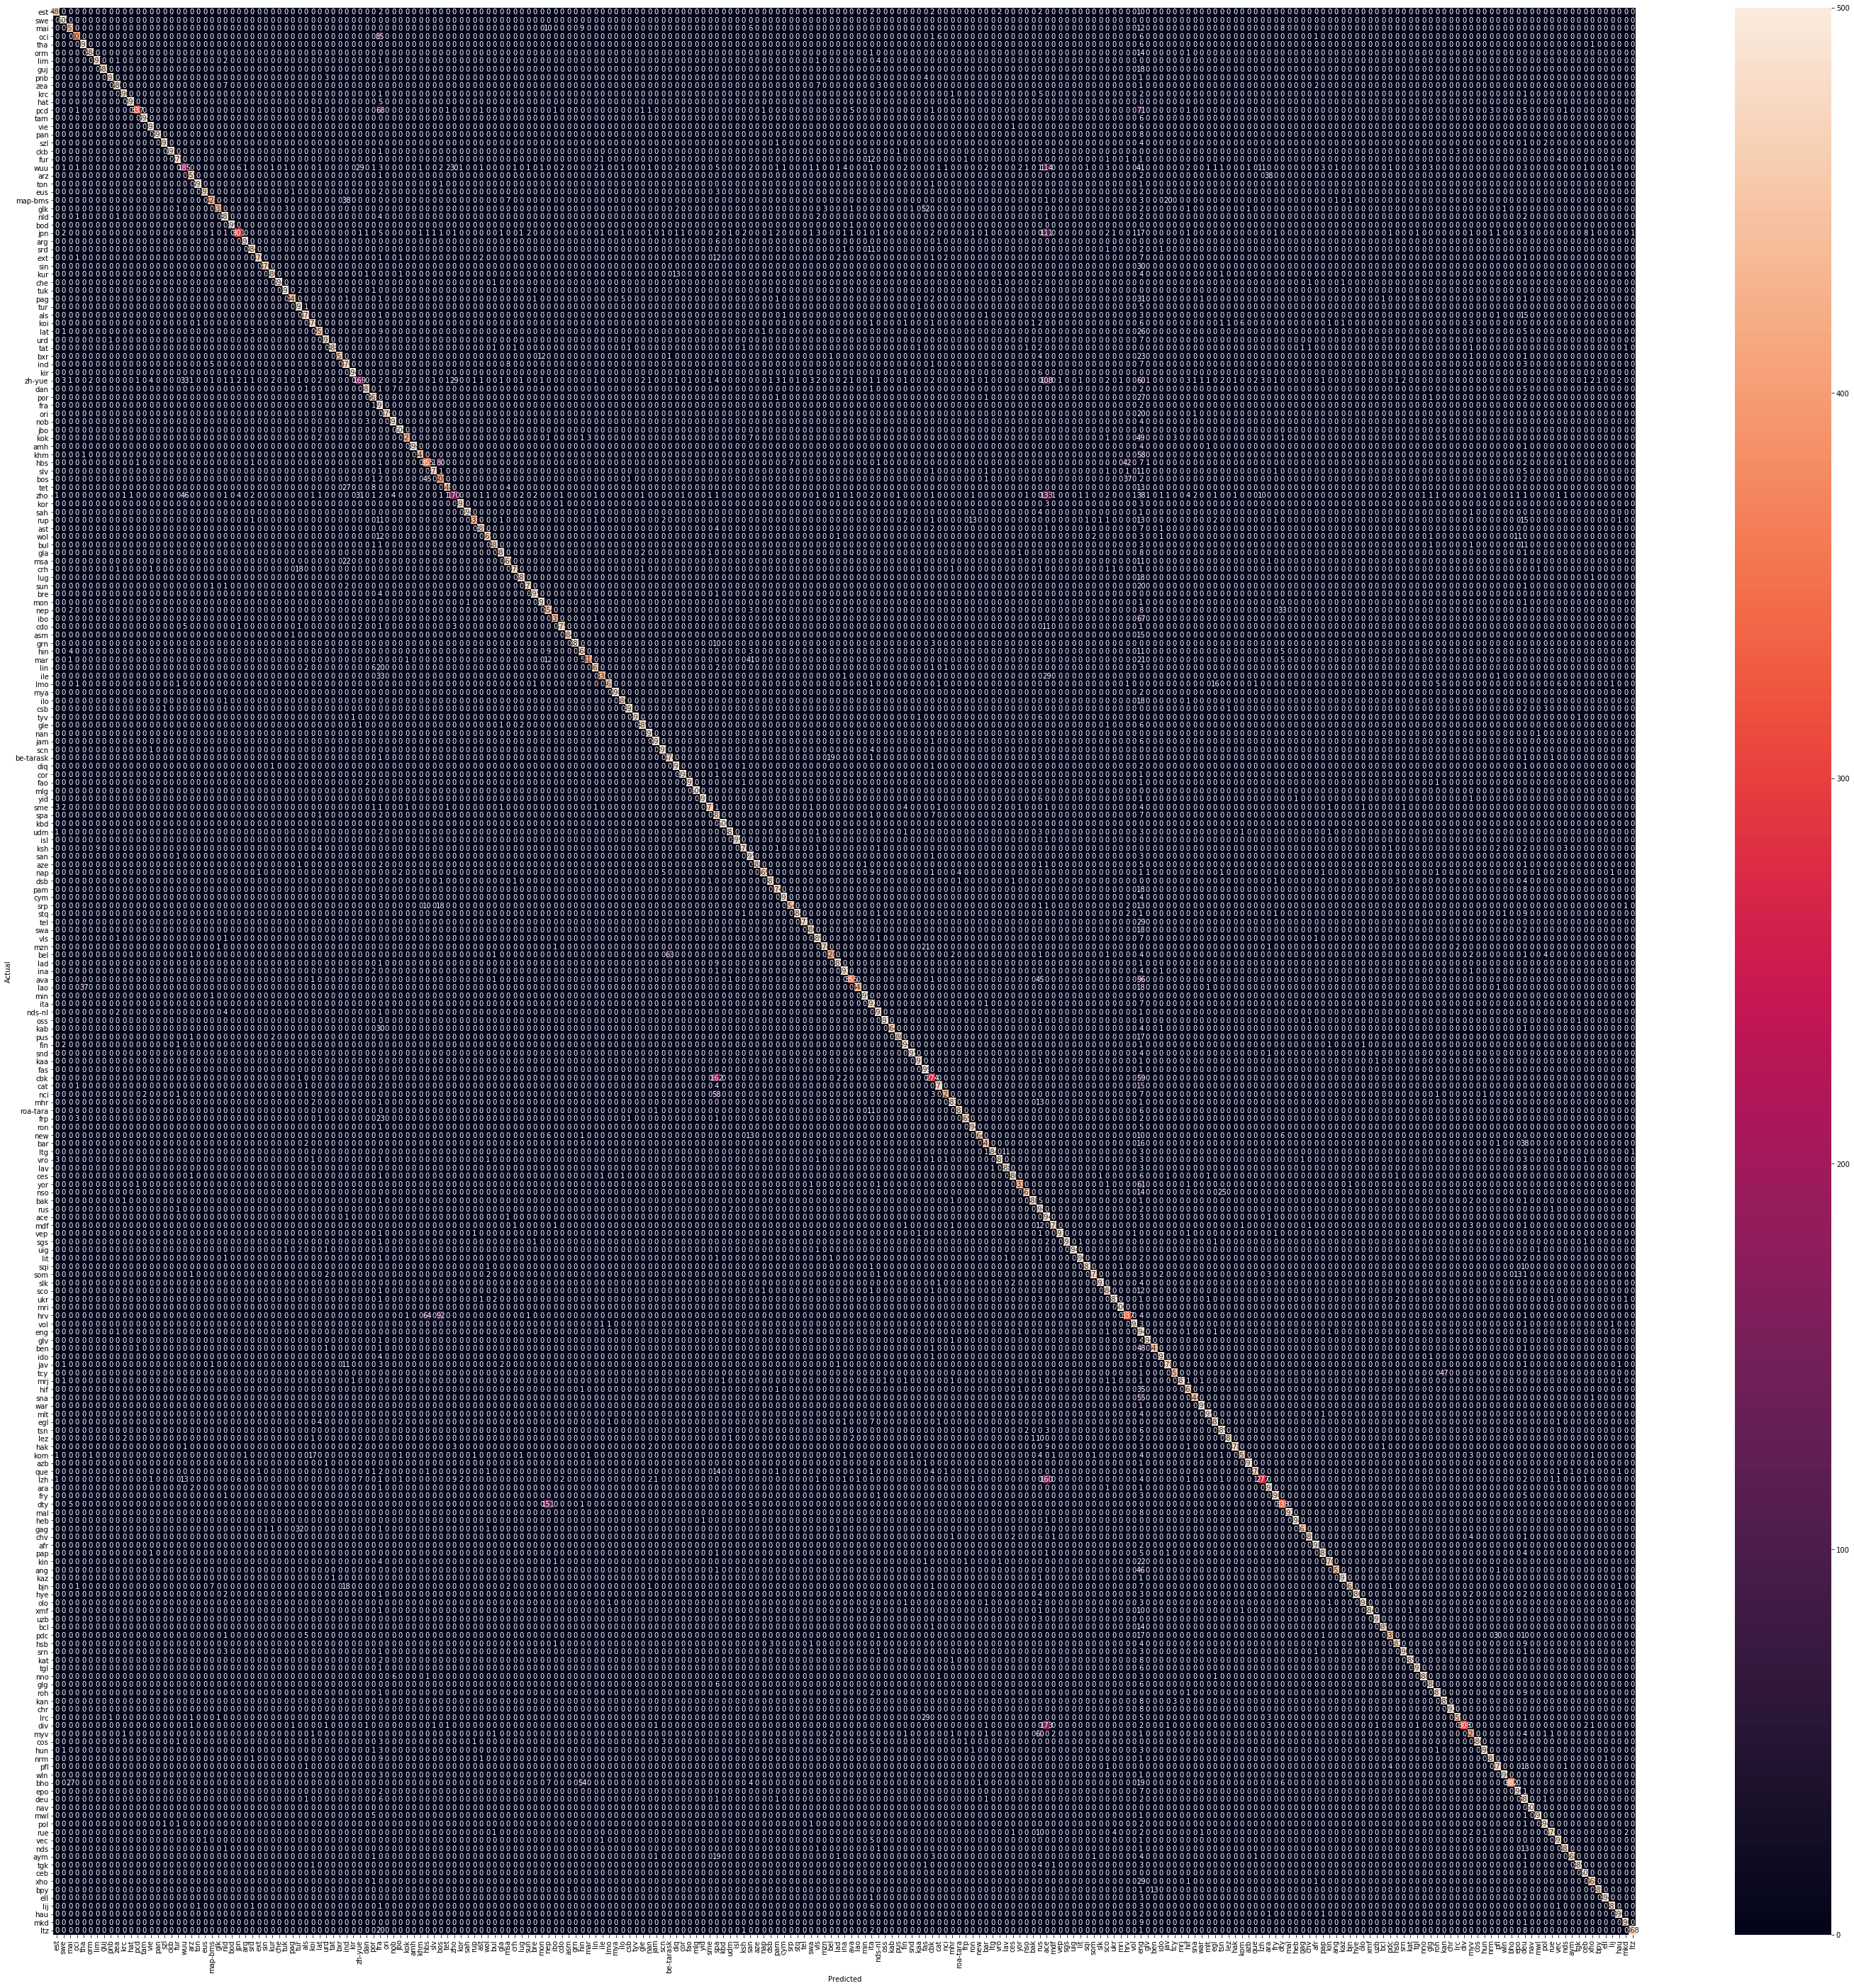

In [14]:
fig, ax = plt.subplots(figsize=(50,50))
sns.heatmap(conf_mat, annot=True, fmt='d',
            xticklabels=id_to_lang.label.values, yticklabels=id_to_lang.label.values)

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show()

In [15]:
# Predictions classified as English
np.sum(predictions == 'eng')

2411